# Fraud Detection
MSCA 31015 Data Science for Consulting

## I. EDA & Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


In [2]:
train = pd.read_csv('C:/Users/Administrator/Downloads/DS for Consulting/Module 7/fraudTrain.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
test = pd.read_csv('C:/Users/Administrator/Downloads/DS for Consulting/Module 7/fraudTrain.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
df = pd.concat([train, test])
df.shape

(2593350, 22)

In [3]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593350 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

### i. numeric variables

In [5]:
df[['amt', 'lat', 'long', 'city_pop','unix_time', 'merch_lat', 'merch_long']].describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
count,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06
mean,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01
std,1.603160e+02,5.075807e+00,1.375907e+01,3.019563e+05,1.284128e+07,5.109787e+00,1.377109e+01
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02
25%,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689730e+01
50%,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01
75%,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195717e+01,-8.023679e+01
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01


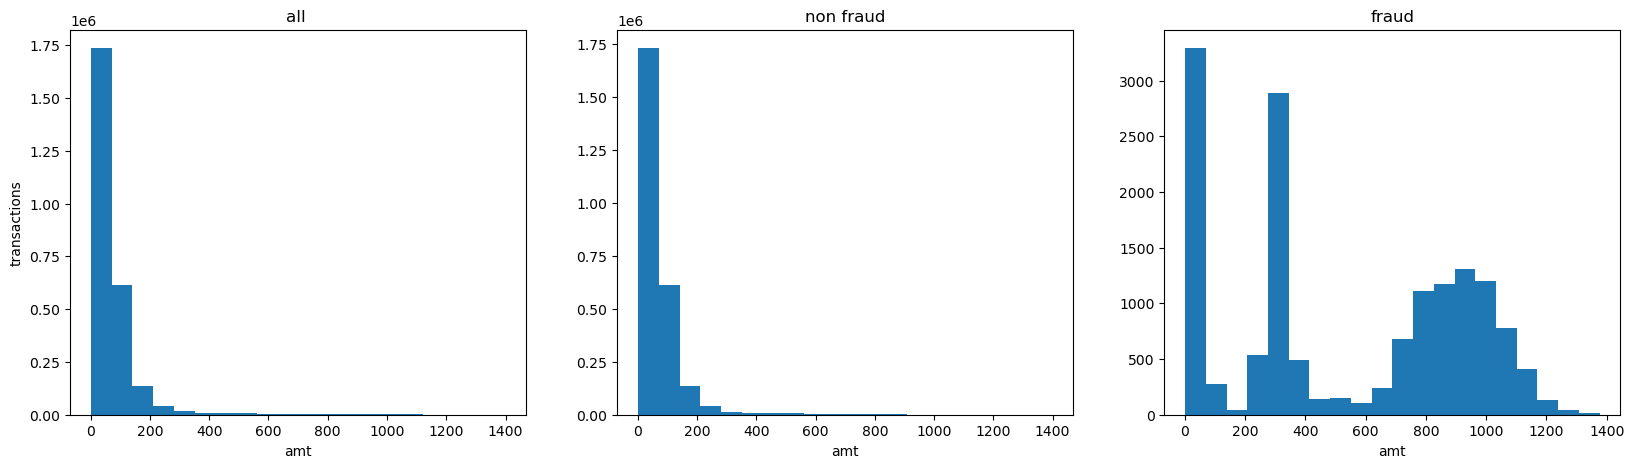

In [6]:
# amt
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')

ax[0].set_xlabel('amt')
ax[1].set_xlabel('amt')
ax[2].set_xlabel('amt')

ax[0].set_title('all ')
ax[1].set_title('non fraud')
ax[2].set_title('fraud')

ax[0].hist(df.loc[df['amt']<=1400, 'amt'], bins=20)
ax[1].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==0), 'amt'], bins=20)
ax[2].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==1), 'amt'], bins=20);

### ii. datetime variables

In [7]:
# trans_date_trans_time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_ym'] = df['trans_date_trans_time'].dt.to_period('M')

In [8]:
df['agg'] = 1
df['index'] = df['trans_date_trans_time']
df = df.set_index('index').sort_index()

# rolling: 60 day transaction amount average by card number
df_amt_60d = df.groupby('cc_num')['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
df_amt_60d.columns = ['cc_num','trans_date','avg_amt_60d']
df_amt_60d['trans_date'] = df_amt_60d['trans_date'].dt.date
df_amt_60d = df_amt_60d.groupby(['cc_num','trans_date'])['avg_amt_60d'].min().reset_index()

# rolling: 60 day transactions by card number
df_60d = df.groupby('cc_num')['agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_60d.columns = ['cc_num','trans_date','60d']
df_60d['trans_date'] = df_60d['trans_date'].dt.date
df_60d = df_60d.groupby(['cc_num','trans_date'])['60d'].min().reset_index()

# merge by cc_num, trans_date
df = df.merge(df_amt_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')\
    .merge(df_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')
df[['avg_amt_60d','60d']]= df[['avg_amt_60d','60d']].fillna(0)

In [9]:
# age = trans_date_trans_time - dob
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

### iii. categorical variables

In [10]:
# gender
(pd.crosstab(df['gender'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
gender,,
F,0.544568,0.002880
M,0.449643,0.002908


In [11]:
# category
(pd.crosstab(df['category'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
category,,
travel,0.031150,0.000089
health_fitness,0.066128,0.000103
grocery_net,0.034949,0.000103
food_dining,0.070419,0.000116
home,0.094794,0.000153
personal_care,0.069823,0.000170
entertainment,0.072324,0.000180
kids_pets,0.086989,0.000184
misc_pos,0.061237,0.000193


In [12]:
# one hot encoding
df = pd.concat([df, pd.get_dummies(df[['gender', 'category']], drop_first=True)], axis=1)

### iv. interactive visualizations

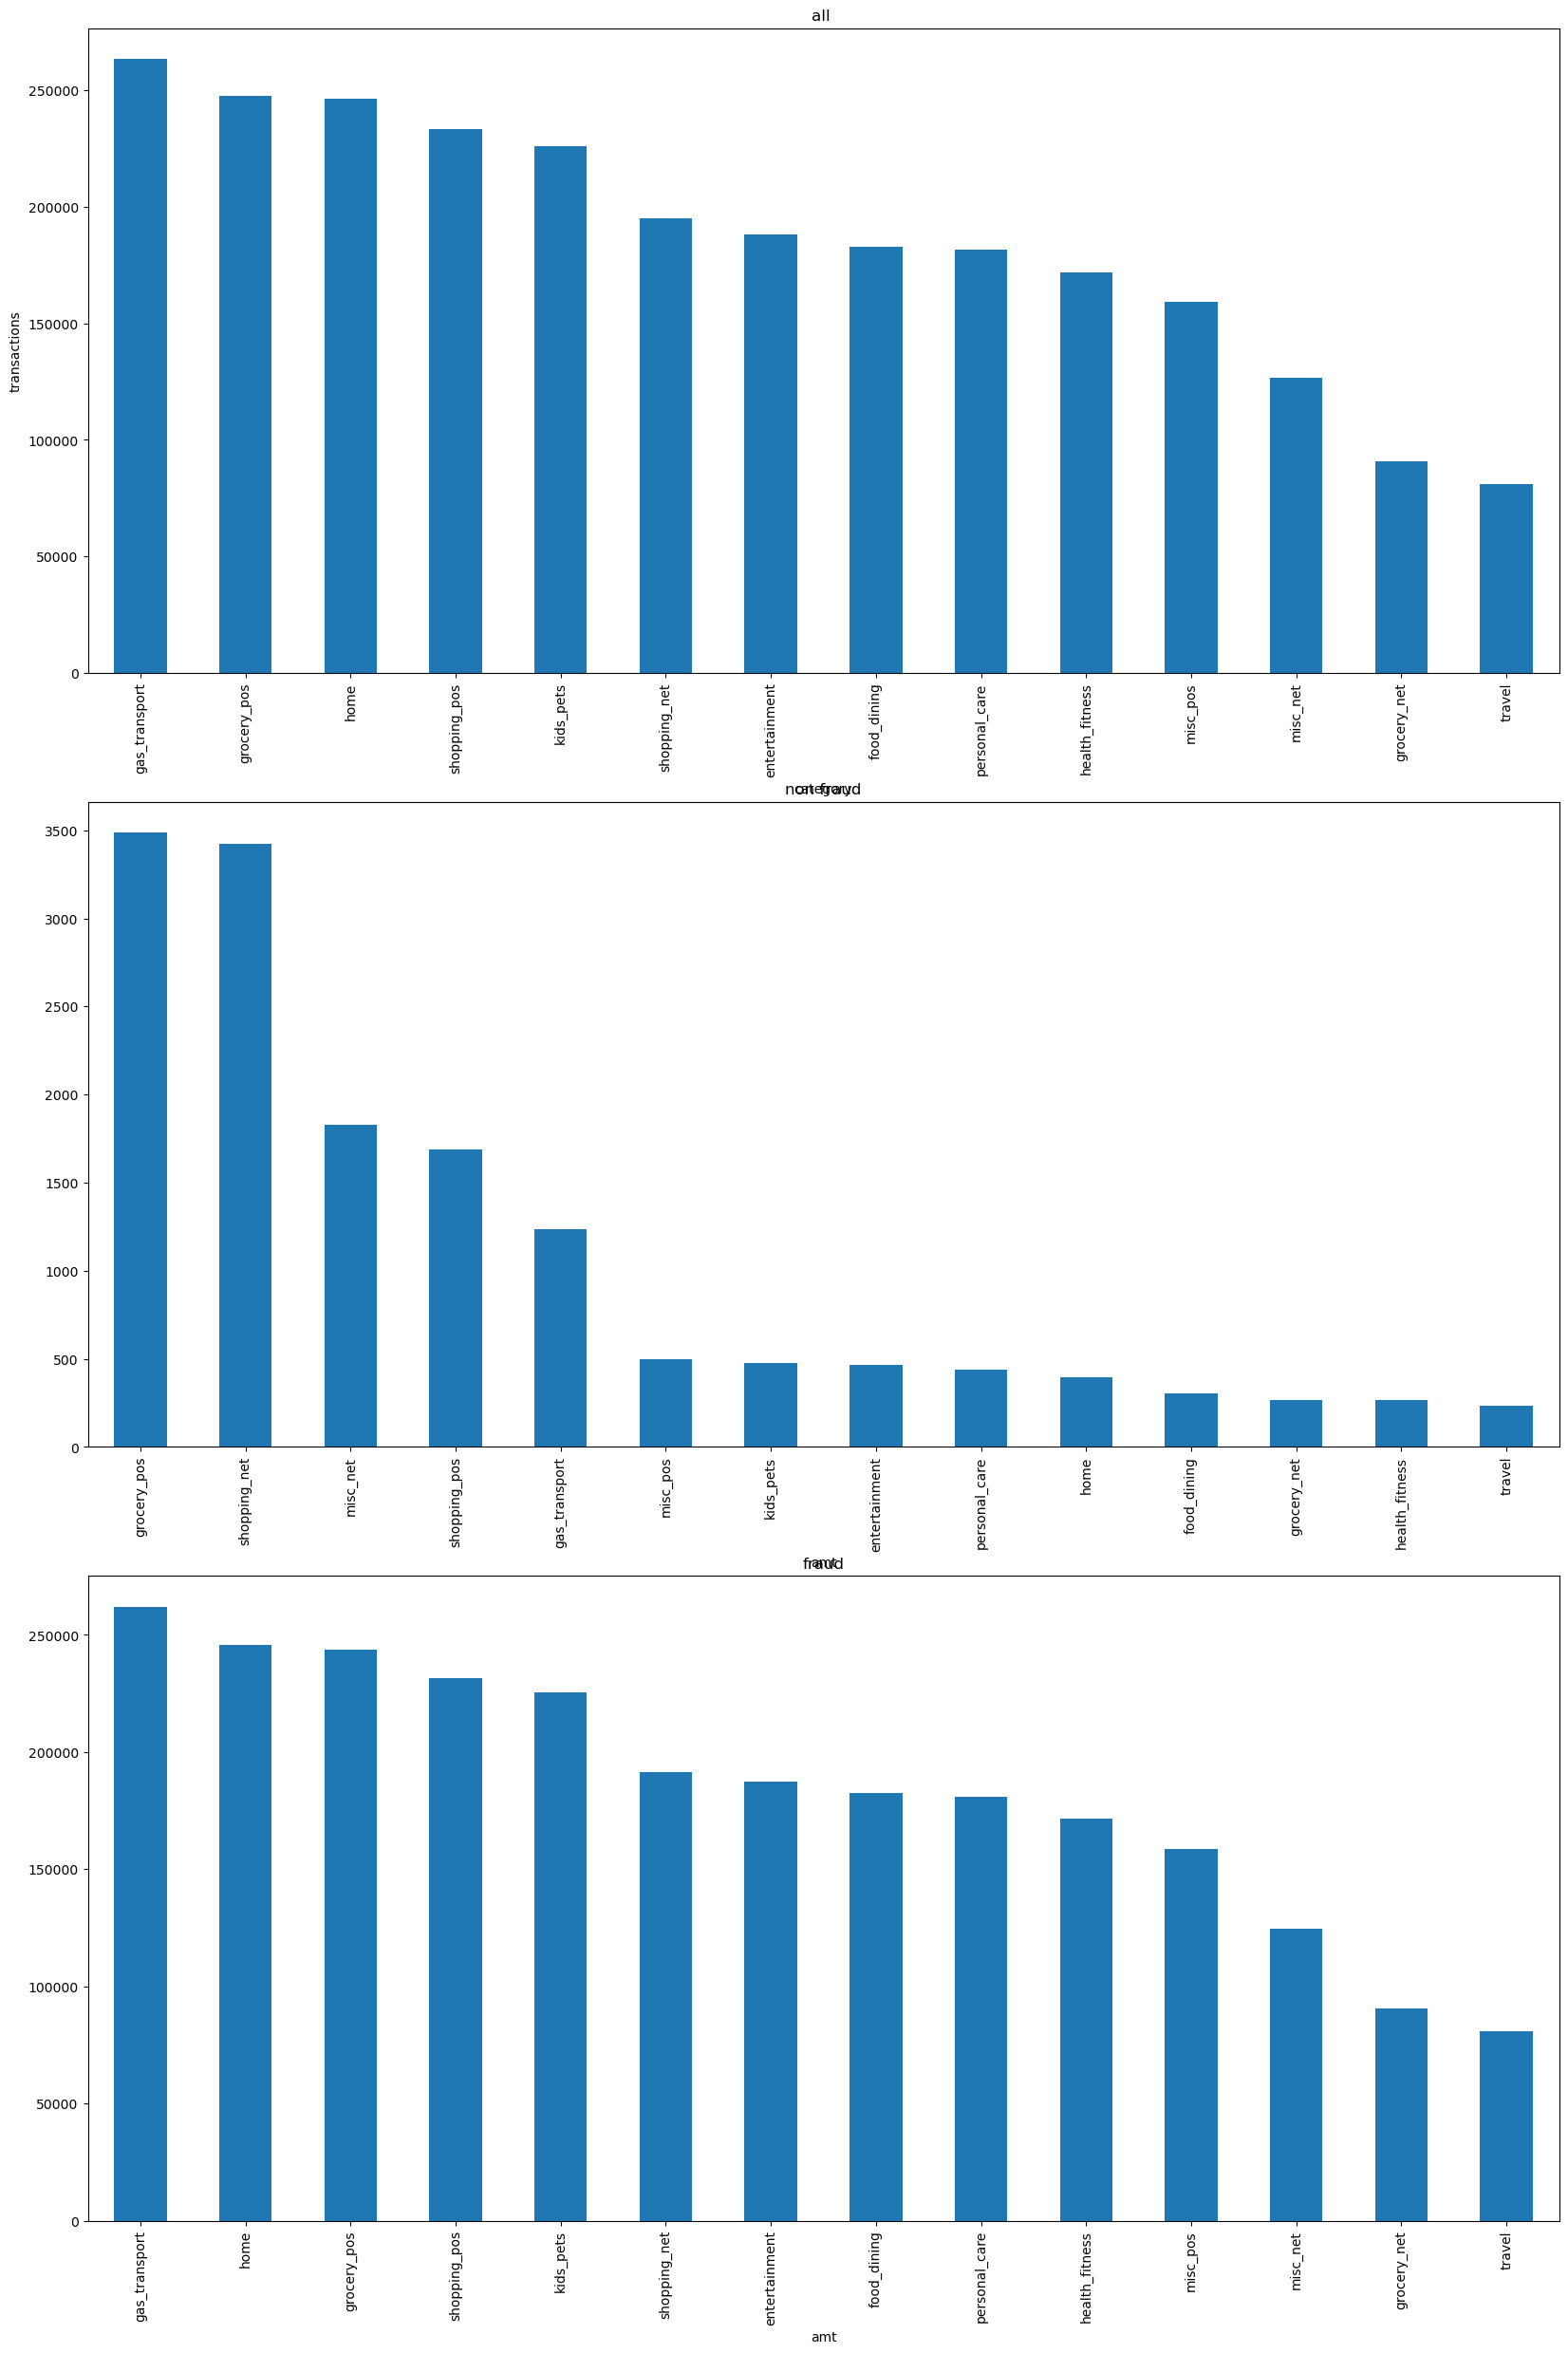

In [13]:
# amt
fig, ax = plt.subplots(3, 1, figsize=(20,30))
ax[0].set_ylabel('transactions')

ax[0].set_xlabel('category')
ax[1].set_xlabel('amt')
ax[2].set_xlabel('amt')

ax[0].set_title('all ')
ax[1].set_title('non fraud')
ax[2].set_title('fraud')
fraud = df[df["is_fraud"]==1]
no_fraud = df[df["is_fraud"]==0]
df["category"].value_counts().plot(kind='bar',ax=ax[0]);
fraud["category"].value_counts().plot(kind='bar',ax=ax[1]);
no_fraud["category"].value_counts().plot(kind='bar',ax=ax[2]);

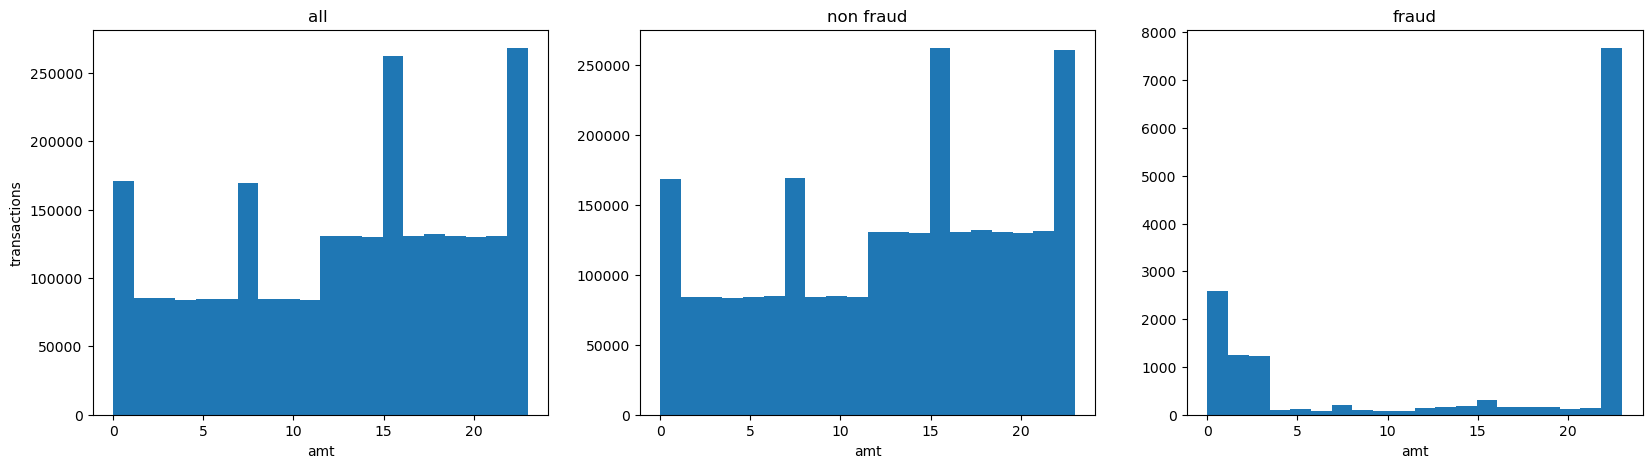

In [14]:
# amt
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')

ax[0].set_xlabel('amt')
ax[1].set_xlabel('amt')
ax[2].set_xlabel('amt')

ax[0].set_title('all ')
ax[1].set_title('non fraud')
ax[2].set_title('fraud')

ax[0].hist(df["trans_hour"], bins=20)
ax[1].hist(df.loc[(df['is_fraud']==0), 'trans_hour'], bins=20)
ax[2].hist(df.loc[(df['is_fraud']==1), 'trans_hour'], bins=20);

## II. Modeling

### i. correlation

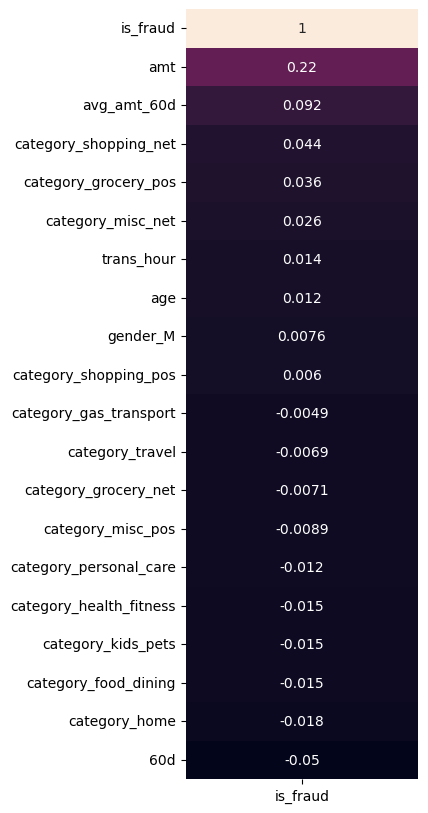

In [15]:
cols = ['amt', 'trans_hour', 'avg_amt_60d', '60d', 'age', 'gender_M', 
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']
import seaborn as sn
plt.figure(figsize=(3,10))
sn.heatmap(df[cols+['is_fraud']].corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cbar=False);

### ii. oversampling

In [16]:
df['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

In [17]:
fraud_oversample = df[df['is_fraud'] == 1].sample(df[df['is_fraud'] == 0]['amt'].count(), replace=True)
df_oversampled = pd.concat([df[df['is_fraud'] == 0], fraud_oversample], axis=0)

###  iii. train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled[cols], df_oversampled['is_fraud'], train_size=2/3)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('train:')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('test:')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    return model

### iv. logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
log_model = model_results(LogisticRegression())

train:
[[1539715  179573]
 [ 363118 1355378]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85   1719288
           1       0.88      0.79      0.83   1718496

    accuracy                           0.84   3437784
   macro avg       0.85      0.84      0.84   3437784
weighted avg       0.85      0.84      0.84   3437784

test:
[[769901  89149]
 [180766 679076]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85    859050
           1       0.88      0.79      0.83    859842

    accuracy                           0.84   1718892
   macro avg       0.85      0.84      0.84   1718892
weighted avg       0.85      0.84      0.84   1718892



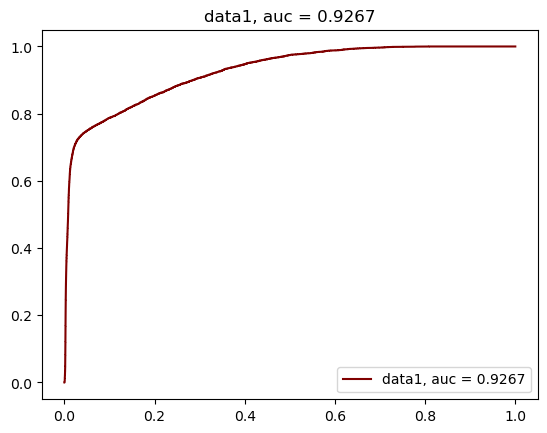

In [21]:
#Create a ROC curve
from sklearn import metrics
y_test_proba = log_model.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_proba[::, 1])
auc = metrics.roc_auc_score(y_test, y_test_proba[::, 1])
auc = round(auc.astype("float"),4)
label1 = "data1, auc = "+repr(auc)
plt.plot(fpr, tpr, label = label1, color = 'maroon')
plt.legend(loc = 4)
plt.title(label1)
plt.show()

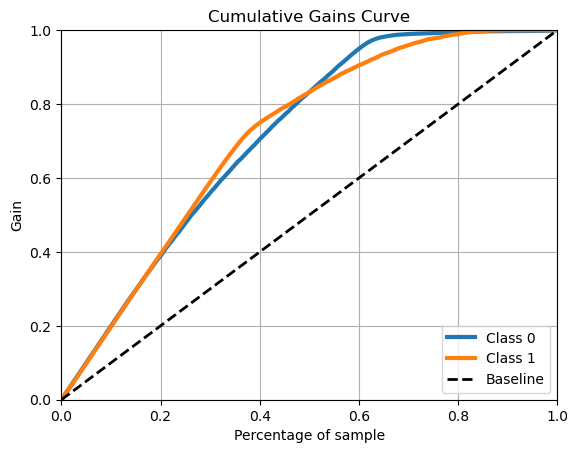

In [22]:
#Gains Chart
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_test_proba)
plt.show()

In [23]:
#Getting the best coefficients
feature_imp = log_model.coef_
coef_table = pd.DataFrame({'features_names': X_train.columns, "Beta": feature_imp[0], "AbsBeta": abs(feature_imp[0])})
#Get sorted values
coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
print("The most important features in the model are: \n")
coef_table

The most important features in the model are: 



,features_names,Beta,AbsBeta
17,category_shopping_pos,-2.840106,2.840106
16,category_shopping_net,-2.637798,2.637798
7,category_gas_transport,2.468247,2.468247
8,category_grocery_net,1.612007,1.612007
13,category_misc_net,-1.524497,1.524497
9,category_grocery_pos,1.266728,1.266728
14,category_misc_pos,1.053728,1.053728
11,category_home,-0.842097,0.842097
15,category_personal_care,0.812712,0.812712
18,category_travel,0.752974,0.752974


### v. decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = model_results(DecisionTreeClassifier(max_depth=3))

train:
[[1677275   42013]
 [ 281383 1437113]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91   1719288
           1       0.97      0.84      0.90   1718496

    accuracy                           0.91   3437784
   macro avg       0.91      0.91      0.91   3437784
weighted avg       0.91      0.91      0.91   3437784

test:
[[838317  20733]
 [139970 719872]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91    859050
           1       0.97      0.84      0.90    859842

    accuracy                           0.91   1718892
   macro avg       0.91      0.91      0.91   1718892
weighted avg       0.91      0.91      0.91   1718892



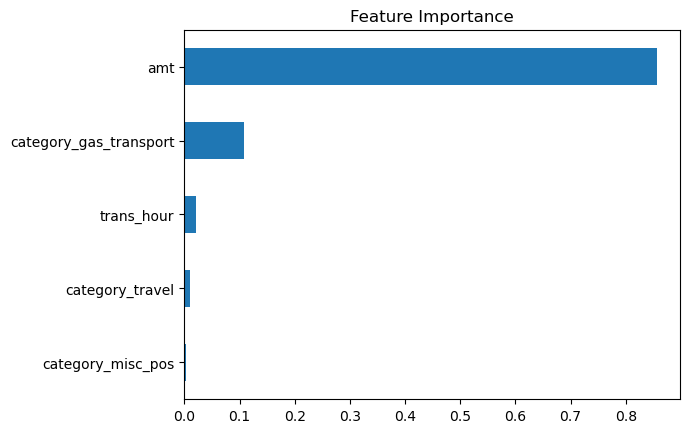

In [25]:
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');

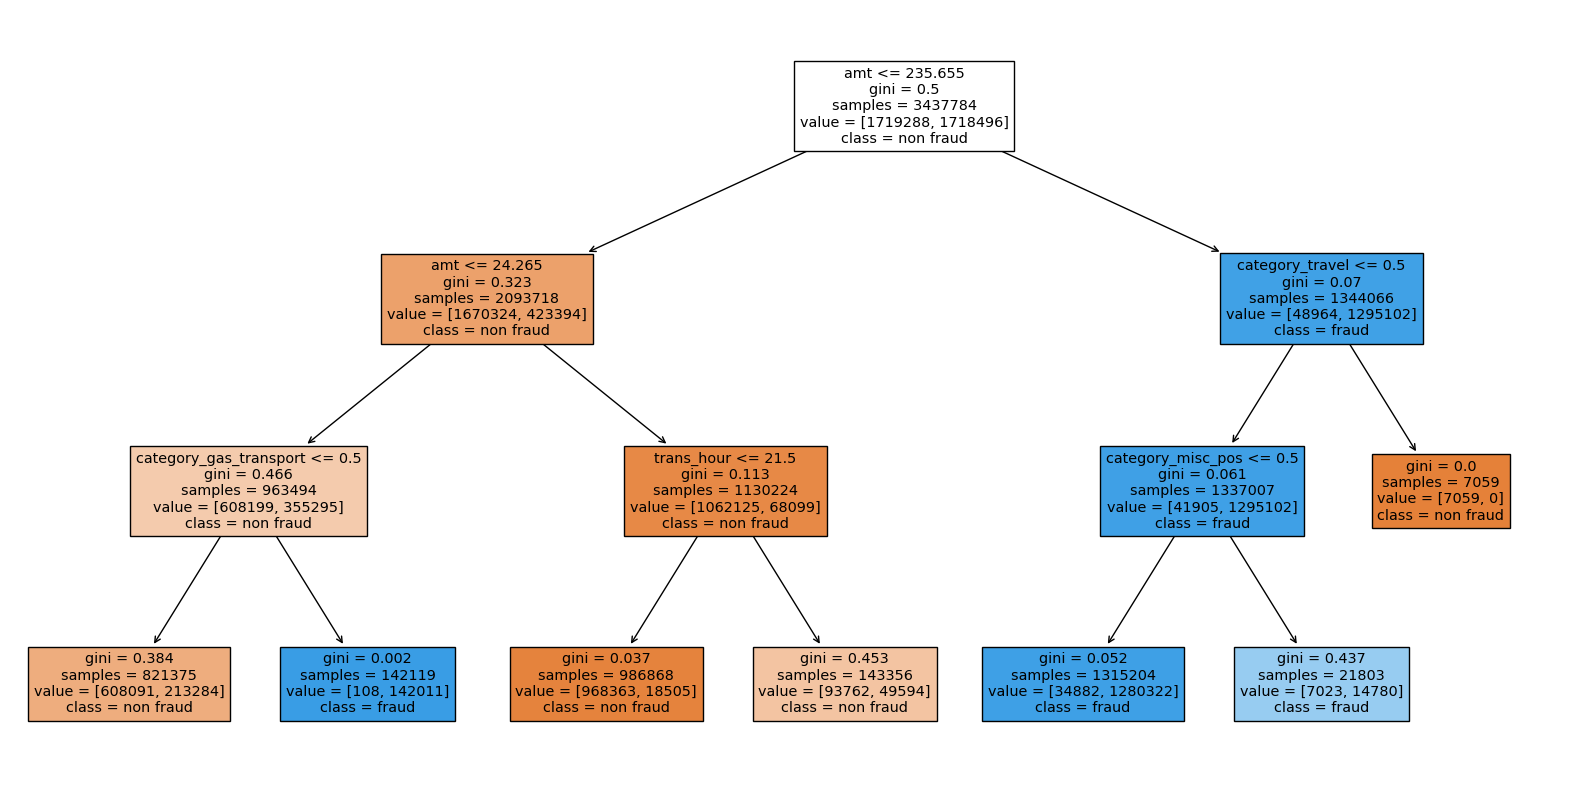

In [26]:
plt.figure(figsize=(20, 10))
from sklearn import tree
tree.plot_tree(dt, max_depth=3, feature_names=cols, class_names=['non fraud', 'fraud'], filled=True);

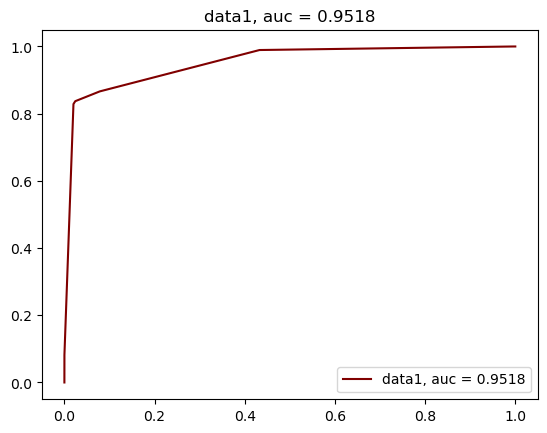

In [27]:
#Create a ROC curve
from sklearn import metrics
y_test_proba = dt.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_proba[::, 1])
auc = metrics.roc_auc_score(y_test, y_test_proba[::, 1])
auc = round(auc.astype("float"),4)
label1 = "data1, auc = "+repr(auc)
plt.plot(fpr, tpr, label = label1, color = 'maroon')
plt.legend(loc = 4)
plt.title(label1)
plt.show()

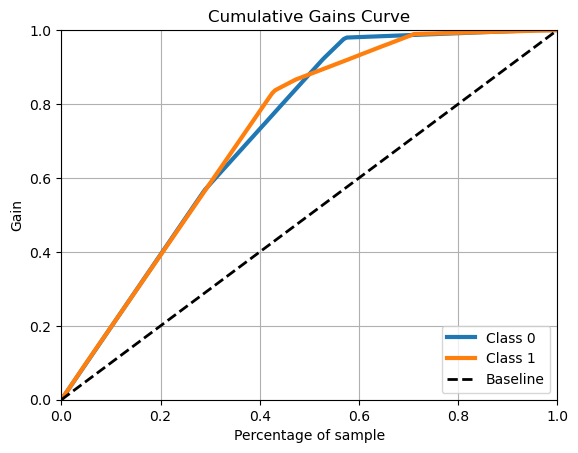

In [28]:
#Gains Chart
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_test_proba)
plt.show()

### vi. random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = model_results(RandomForestClassifier(n_estimators=10, max_depth=3))

train:
[[1604434  114854]
 [ 257814 1460682]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90   1719288
           1       0.93      0.85      0.89   1718496

    accuracy                           0.89   3437784
   macro avg       0.89      0.89      0.89   3437784
weighted avg       0.89      0.89      0.89   3437784

test:
[[802304  56746]
 [127883 731959]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90    859050
           1       0.93      0.85      0.89    859842

    accuracy                           0.89   1718892
   macro avg       0.90      0.89      0.89   1718892
weighted avg       0.90      0.89      0.89   1718892



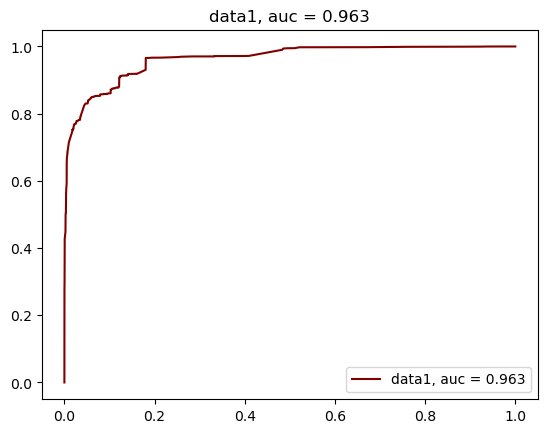

In [30]:
#Create a ROC curve
from sklearn import metrics
y_test_proba = rf.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_proba[::, 1])
auc = metrics.roc_auc_score(y_test, y_test_proba[::, 1])
auc = round(auc.astype("float"),4)
label1 = "data1, auc = "+repr(auc)
plt.plot(fpr, tpr, label = label1, color = 'maroon')
plt.legend(loc = 4)
plt.title(label1)
plt.show()

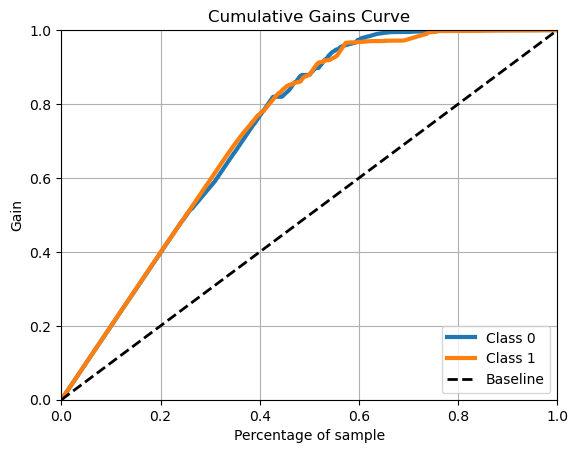

In [31]:
#Gains Chart
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_test_proba)
plt.show()

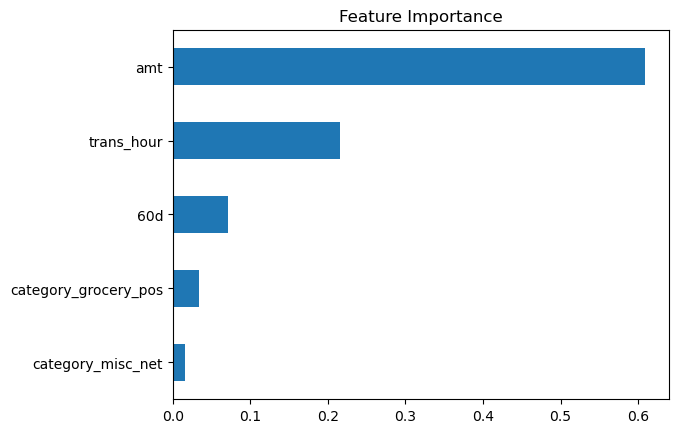

In [32]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');

### vii. xgboost

In [33]:
from xgboost import XGBClassifier
xg = model_results(XGBClassifier(n_estimators=10, max_depth=3))

[05:13:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train:
[[1661060   58228]
 [ 131134 1587362]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95   1719288
           1       0.96      0.92      0.94   1718496

    accuracy                           0.94   3437784
   macro avg       0.95      0.94      0.94   3437784
weighted avg       0.95      0.94      0.94   3437784

test:
[[830156  28894]
 [ 65399 794443]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    859050
           1       0.96      0.92      0.94    859842

    accuracy                           0.95   1718892
   macro avg       0.95      0.95      0.

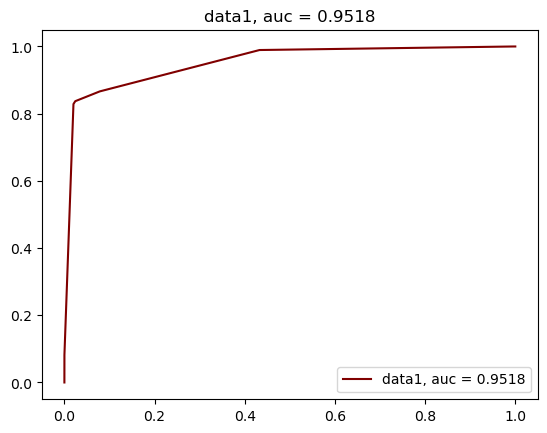

In [34]:
#Create a ROC curve
from sklearn import metrics
y_test_proba = dt.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_proba[::, 1])
auc = metrics.roc_auc_score(y_test, y_test_proba[::, 1])
auc = round(auc.astype("float"),4)
label1 = "data1, auc = "+repr(auc)
plt.plot(fpr, tpr, label = label1, color = 'maroon')
plt.legend(loc = 4)
plt.title(label1)
plt.show()

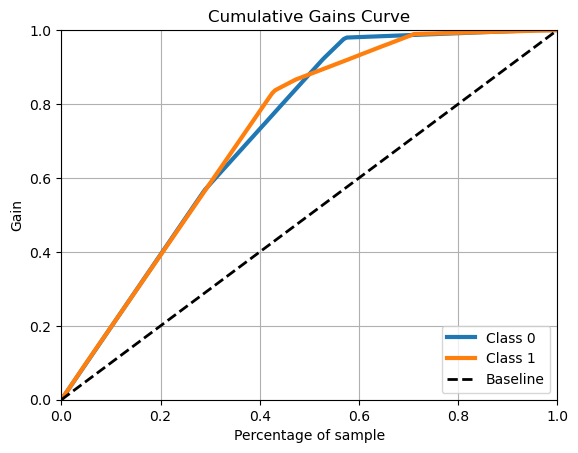

In [35]:
#Gains Chart
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_test_proba)
plt.show()

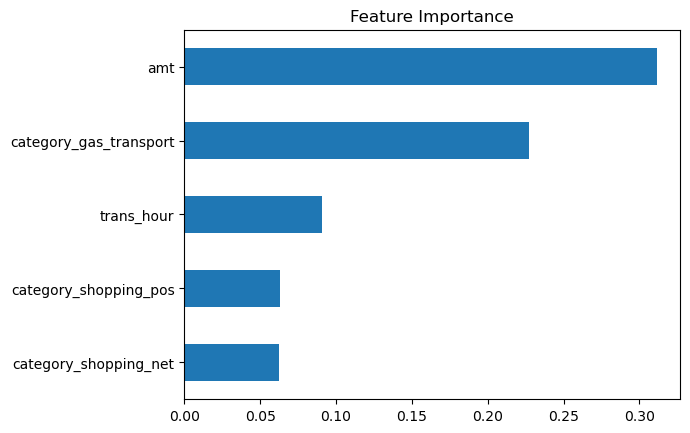

In [36]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');